In [1]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

## Check that it can recognize holes

In [2]:
n = 20
points_to_plot = []
for k in range(n):
    p_k = np.array([math.cos(2*math.pi* k / n), math.sin(2*math.pi* k / n)])
    points_to_plot.append(p_k)
    
points_to_plot = np.array(points_to_plot)

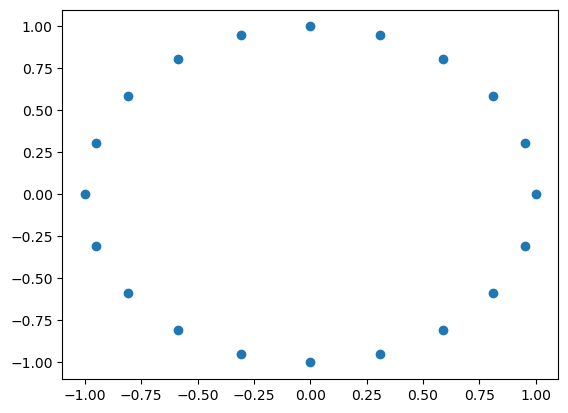

In [3]:
plt.scatter(points_to_plot[:,0], points_to_plot[:,1])
plt.show()

In [4]:
diagrams = ripser(points_to_plot)['dgms']

In [5]:
diagrams

[array([[0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        , 0.31286892],
        [0.        ,        inf]]),
 array([[0.31286892, 1.78201306]])]

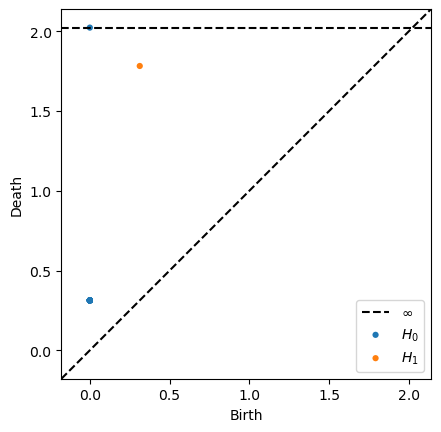

In [6]:
plot_diagrams(diagrams, show=True)

## Change Field of Coefficients

Taken from https://ripser.scikit-tda.org/en/latest/notebooks/Moebius%20Strip%20And%20The%20Field%20of%20Coefficients.html

In [7]:
N = 100 # Number of points to sample
R = 4   # Big radius of torus
r = 1   # Little radius of torus
X = np.zeros((N, 3))
t = np.linspace(0, 2*np.pi, N)

In [8]:
X[:, 0] = (R + r*np.cos(t))*np.cos(2*t)
X[:, 1] = (R + r*np.cos(t))*np.sin(2*t)
X[:, 2] = r*np.sin(t)

In [9]:
## Compute persistent homology
dgms2 = ripser(X, coeff=2)['dgms']
dgms3 = ripser(X, coeff=3)['dgms']

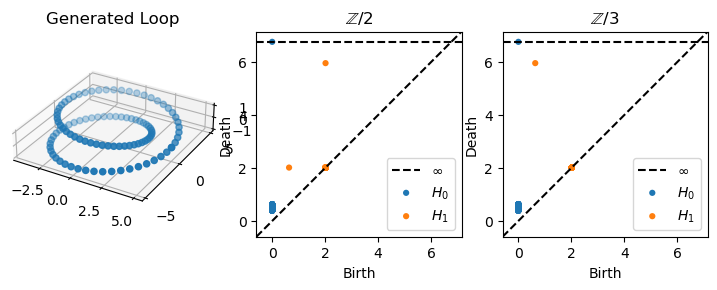

In [10]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_aspect('equal')
plt.title("Generated Loop")
plt.subplot(132)
plot_diagrams(dgms2)
plt.title("$\mathbb{Z} / 2$")
plt.subplot(133)
plot_diagrams(dgms3)
plt.title("$\mathbb{Z} / 3$")


plt.show()